# Predicting power conversion efficiency of organic solar cells using machine learning

Organic solar cell have shown remarkable performance in last decade and power conversion efficiency have reached more than 18%. In the process of finding high performance materials for organic solar cells, it is meaningfull if one can establish relation with chemical structures of organic donor:acceptor materials and their photovoltaic properties. From literature we have collected a dataset for 200 unique D:A combination. Dataset consists of RDKit descriptors for each donor and acceptor material and these will be used to predict efficiency of OSCs. Two machine learning algorithms (Random Forest Regressor and Gradient Boosting Regressor) are used to predict PCE and results obtained are compared on the basis of Pearson's correlation cofficient (r). Gradient boosting regressor gave better results (r = 0.7) than random forest regressor (r = 0.68). We then trained gradient boosting model on complete 200 dataset and predicted PCE of 6450  unexplored D:A combination. Top 20 D:A combinations from the predicted set are filtered out for fabrication in the lab.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.stats import pearsonr
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut 
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Import dataset
200 unique D:A combination
Donors : Polymer
Acceptors : Small molecules

In [2]:
a = pd.read_csv('200 DA combination.csv')

In [3]:
a

,Unnamed: 0,Donor,Acceptor,Donor_can_smiles,Acceptor_can_smiles,PCE,D:A,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MaxAbsEStateIndex,...,Acceptor_fr_sulfide,Acceptor_fr_sulfonamd,Acceptor_fr_sulfone,Acceptor_fr_term_acetylene,Acceptor_fr_tetrazole,Acceptor_fr_thiazole,Acceptor_fr_thiocyan,Acceptor_fr_thiophene,Acceptor_fr_unbrch_alkane,Acceptor_fr_urea
0,0,D-0F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,11.60,D-0F:C8-ITIC,15.826616,0.070509,15.826616,...,0,0,0,0,0,0,0,4,16,0
1,1,D-2F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,12.20,D-2F:C8-ITIC,17.472290,-0.373608,17.472290,...,0,0,0,0,0,0,0,4,16,0
2,2,D-4F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,8.80,D-4F:C8-ITIC,18.497612,-0.645564,18.497612,...,0,0,0,0,0,0,0,4,16,0
3,3,D-0F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,8.00,D-0F:ITIC,15.826616,0.070509,15.826616,...,0,0,0,0,0,0,0,4,8,0
4,4,D-2F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,8.90,D-2F:ITIC,17.472290,-0.373608,17.472290,...,0,0,0,0,0,0,0,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,J73,m-ITIC,CCCCCCCCC(Cn1nc2c(n1)c(c1ccc(s1)C)c(c(c2c1ccc(...,CCCCCCc1cccc(c1)C1(c2cccc(c2)CCCCCC)c2cc3c4sc5...,10.71,J73:m-ITIC,17.546757,-1.774777,17.546757,...,0,0,0,0,0,0,0,4,8,0
196,196,J74,m-ITIC,CCCCCCCCC(Cn1nc2c(n1)c(c1ccc(s1)C)c(c(c2c1ccc(...,CCCCCCc1cccc(c1)C1(c2cccc(c2)CCCCCC)c2cc3c4sc5...,9.63,J74:m-ITIC,17.398135,-1.677300,17.398135,...,0,0,0,0,0,0,0,4,8,0
197,197,J81,ITIC,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,8.03,J81:ITIC,17.387649,-1.763283,17.387649,...,0,0,0,0,0,0,0,4,8,0
198,198,J81,m-ITIC,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCc1cccc(c1)C1(c2cccc(c2)CCCCCC)c2cc3c4sc5...,7.21,J81:m-ITIC,17.387649,-1.763283,17.387649,...,0,0,0,0,0,0,0,4,8,0


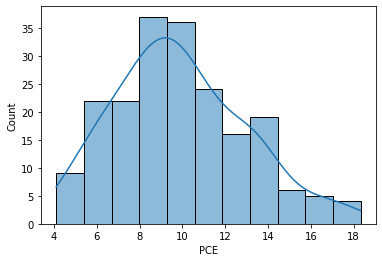

In [4]:
sns.histplot(a,x='PCE',kde=True)

In [5]:
b=a.drop(['Unnamed: 0','Donor', 'Acceptor', 'Donor_can_smiles', 'Acceptor_can_smiles','D:A','PCE'],axis=1)           #(if want to calculate only descriptors commentline this code and use code for only descriptors)

In [6]:
b

,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MaxAbsEStateIndex,Donor_MinAbsEStateIndex,Donor_qed,Donor_MolWt,Donor_HeavyAtomMolWt,Donor_ExactMolWt,Donor_NumValenceElectrons,Donor_NumRadicalElectrons,...,Acceptor_fr_sulfide,Acceptor_fr_sulfonamd,Acceptor_fr_sulfone,Acceptor_fr_term_acetylene,Acceptor_fr_tetrazole,Acceptor_fr_thiazole,Acceptor_fr_thiocyan,Acceptor_fr_thiophene,Acceptor_fr_unbrch_alkane,Acceptor_fr_urea
0,15.826616,0.070509,15.826616,0.070509,0.046822,1185.922,1105.282,1184.392400,412,0,...,0,0,0,0,0,0,0,4,16,0
1,17.472290,-0.373608,17.472290,0.140776,0.046822,1221.902,1143.278,1220.373556,424,0,...,0,0,0,0,0,0,0,4,16,0
2,18.497612,-0.645564,18.497612,0.079293,0.043799,1257.882,1181.274,1256.354713,436,0,...,0,0,0,0,0,0,0,4,16,0
3,15.826616,0.070509,15.826616,0.070509,0.046822,1185.922,1105.282,1184.392400,412,0,...,0,0,0,0,0,0,0,4,8,0
4,17.472290,-0.373608,17.472290,0.140776,0.046822,1221.902,1143.278,1220.373556,424,0,...,0,0,0,0,0,0,0,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17.546757,-1.774777,17.546757,0.233235,0.028395,1321.229,1217.405,1319.598286,472,0,...,0,0,0,0,0,0,0,4,8,0
196,17.398135,-1.677300,17.398135,0.225590,0.029277,1265.121,1169.361,1263.535686,448,0,...,0,0,0,0,0,0,0,4,8,0
197,17.387649,-1.763283,17.387649,0.164752,0.030382,1204.931,1113.203,1203.550073,436,0,...,0,0,0,0,0,0,0,4,8,0
198,17.387649,-1.763283,17.387649,0.164752,0.030382,1204.931,1113.203,1203.550073,436,0,...,0,0,0,0,0,0,0,4,8,0


In [7]:
output=a['PCE']

In [8]:
b=b.drop(['Donor_Ipc','Acceptor_Ipc'],axis=1)

In [9]:
b.shape

(200, 414)

# Feature engineering

In [10]:
# Feature Engineering
print('Total features :',len(b.columns))
b=b.select_dtypes(include='number')  
print('Features with zero standard deviation :',len(b.std()[b.std() == 0]))
b=b.drop(b.std()[b.std() == 0].index.values, axis=1)  # Dropping features with zero std deviation
b = b.replace([np.inf, -np.inf], np.nan)
b = b.replace(np.nan,0)  #replace null values with zero

Total features : 414
Features with zero standard deviation : 130


In [11]:
b.shape

(200, 284)

In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(b, 0.8)
print('Features with correlation more than 0.8 :',len(set(corr_features)))
b=b.drop(corr_features,axis=1)   # Dropping features with correlation more than 0.8

Features with correlation more than 0.8 : 161


In [13]:
b.shape

(200, 123)

# Visualization of Descision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [15]:
regr = DecisionTreeRegressor(max_depth=3, random_state=42)
model_ = regr.fit(b, output)

In [16]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_79 <= 9.81
|   |--- feature_71 <= 0.02
|   |   |--- feature_3 <= 0.05
|   |   |   |--- value: [12.19]
|   |   |--- feature_3 >  0.05
|   |   |   |--- value: [10.03]
|   |--- feature_71 >  0.02
|   |   |--- feature_101 <= 4.34
|   |   |   |--- value: [8.42]
|   |   |--- feature_101 >  4.34
|   |   |   |--- value: [12.09]
|--- feature_79 >  9.81
|   |--- feature_10 <= 9.93
|   |   |--- feature_106 <= 73.86
|   |   |   |--- value: [15.45]
|   |   |--- feature_106 >  73.86
|   |   |   |--- value: [8.20]
|   |--- feature_10 >  9.93
|   |   |--- feature_48 <= 1.88
|   |   |   |--- value: [16.21]
|   |   |--- feature_48 >  1.88
|   |   |   |--- value: [9.91]



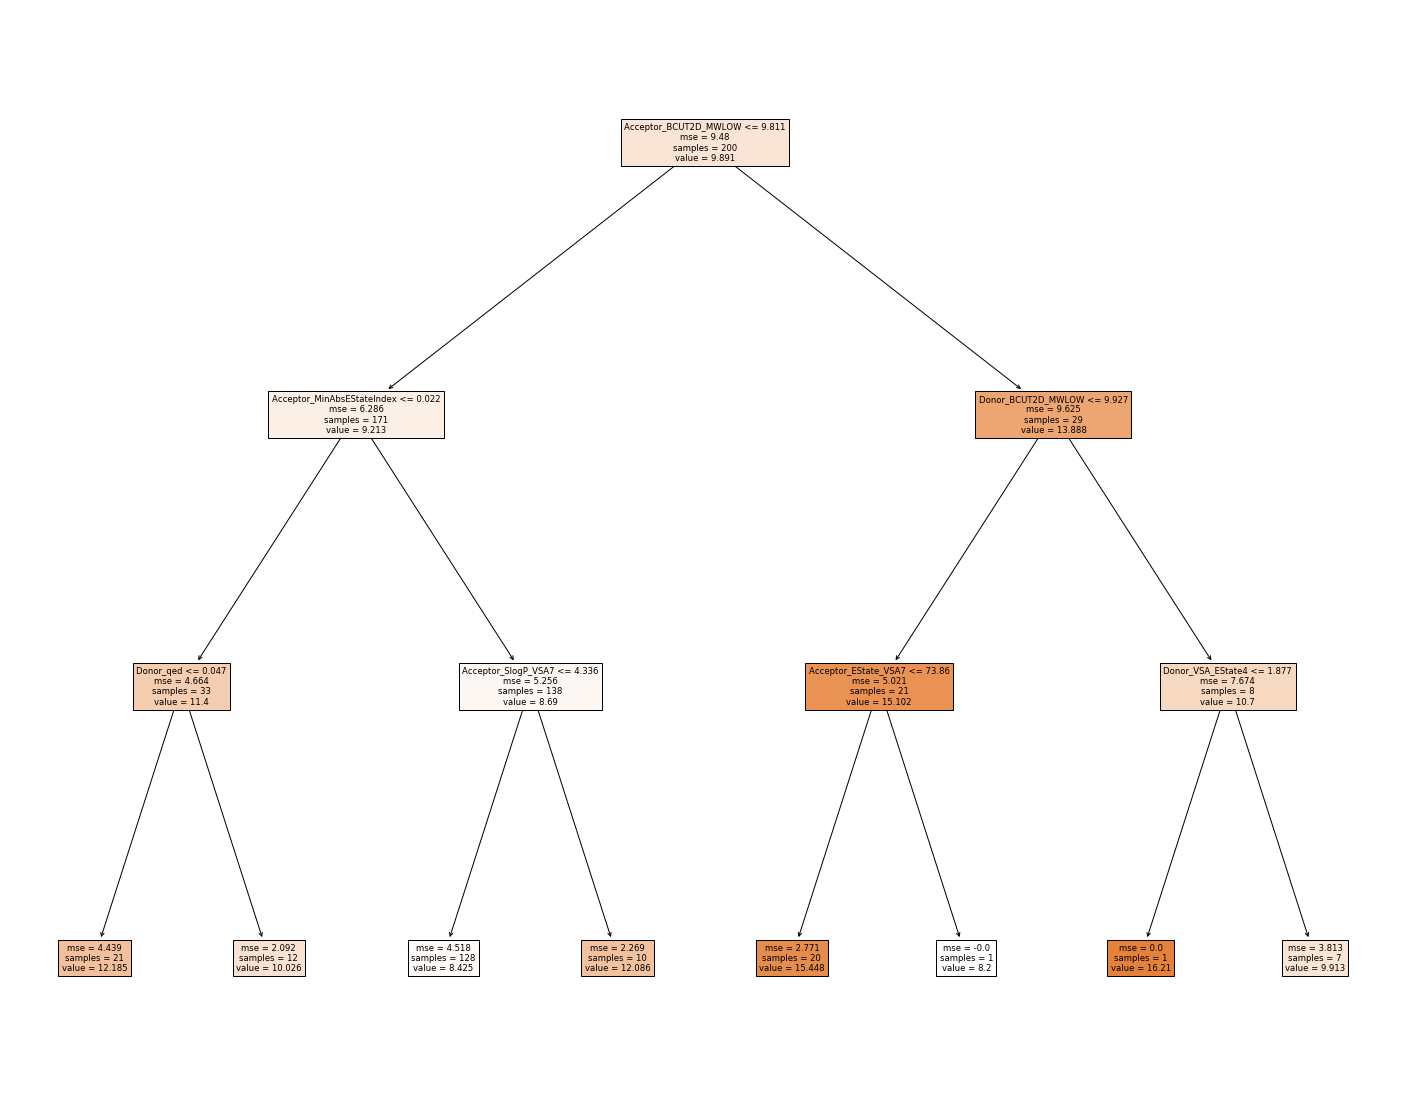

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_, feature_names=b.columns, filled=True)

In [18]:
regr1 = DecisionTreeRegressor(max_depth=10, random_state=1369)
model_1 = regr1.fit(b, output)

In [19]:
text_representation = tree.export_text(regr1)
print(text_representation)

|--- feature_79 <= 9.81
|   |--- feature_71 <= 0.02
|   |   |--- feature_3 <= 0.05
|   |   |   |--- feature_71 <= 0.00
|   |   |   |   |--- feature_70 <= -1.19
|   |   |   |   |   |--- value: [9.30]
|   |   |   |   |--- feature_70 >  -1.19
|   |   |   |   |   |--- value: [6.40]
|   |   |   |--- feature_71 >  0.00
|   |   |   |   |--- feature_49 <= 0.40
|   |   |   |   |   |--- feature_72 <= 0.02
|   |   |   |   |   |   |--- value: [13.68]
|   |   |   |   |   |--- feature_72 >  0.02
|   |   |   |   |   |   |--- feature_17 <= -3.07
|   |   |   |   |   |   |   |--- feature_52 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [9.90]
|   |   |   |   |   |   |   |--- feature_52 >  0.50
|   |   |   |   |   |   |   |   |--- value: [9.12]
|   |   |   |   |   |   |--- feature_17 >  -3.07
|   |   |   |   |   |   |   |--- feature_52 <= 0.57
|   |   |   |   |   |   |   |   |--- value: [12.72]
|   |   |   |   |   |   |   |--- feature_52 >  0.57
|   |   |   |   |   |   |   |   |--- feature_90 <= 79

# A bigger descision tree

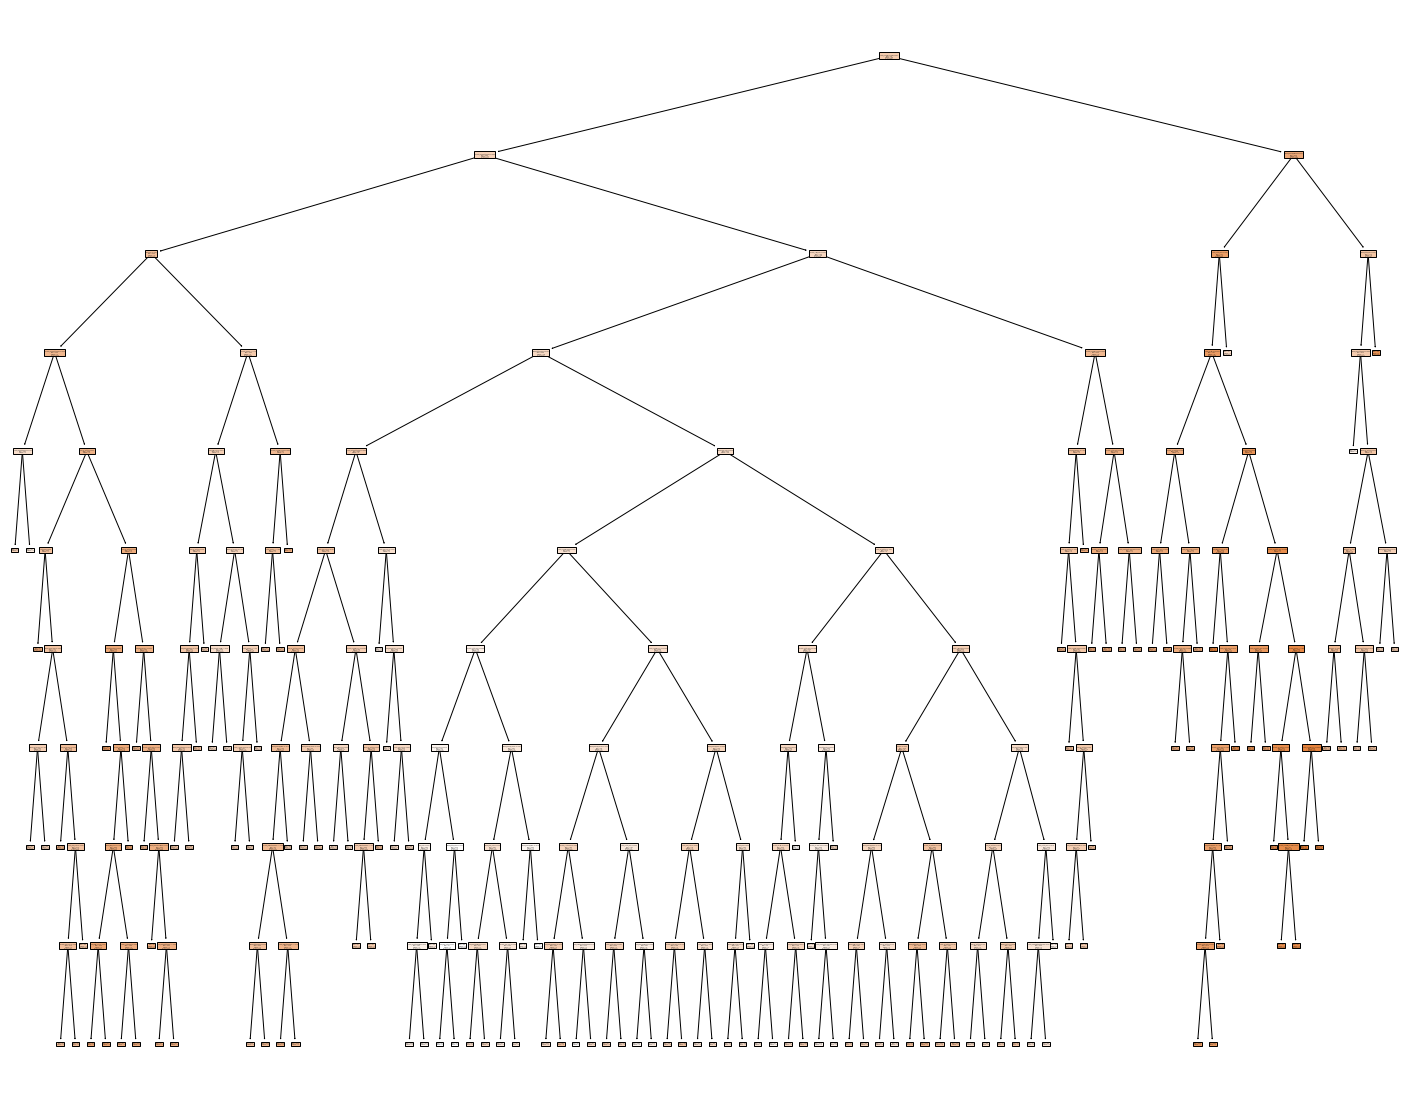

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_1, feature_names=b.columns, filled=True)

# Results calculation using LOOCV

In [21]:
#Preparing dataset for LOOCV

loocv_df=b

Xr = loocv_df
yr = output
features = len(Xr.columns)
print('Features left :',features)

Features left : 123


In [22]:
# Creating a pipeline for feature scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('std_scaler', StandardScaler())])
Xr1 = my_pipeline.fit_transform(Xr)
X_array = np.array(Xr1)
y_array = np.array(yr)

# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
def MSE(X,Y):
    mse=mean_squared_error(X,Y)
    return mse
def RMSE(X,Y):
    rmse=np.sqrt(mean_squared_error(X,Y))
    return rmse
def MAPE(X,Y):
    mape=np.average(abs(np.array(X)-np.array(Y))/np.array(Y))*100
    return mape

In [23]:
#Tuning SVM using GridSearchCV
from sklearn.model_selection import GridSearchCV
my_cv = LeaveOneOut()
param_grid = {'C': [10,20,30,40,50,60,70,80,90,100], 
'epsilon':[0.1,0.01,0.001]}

nn = model1 = SVR()
tune_SVM = GridSearchCV(estimator=nn, param_grid=param_grid, scoring='neg_mean_squared_error',cv=my_cv)
tune_SVM.fit(X_array,y_array)
# print clf.best_score_
tune_SVM.best_params_

{'C': 10, 'epsilon': 0.1}

In [24]:
# Results
loo = LeaveOneOut()
ytests = []
y_pred_list_RF = []
y_pred_list_GB = []
y_pred_list_SVM = []
y_pred_list_ANN = []
for train_idx, test_idx in loo.split(Xr):
    X_train_loocv, X_test_loocv = X_array[train_idx], X_array[test_idx] #requires arrays
    y_train_loocv, y_test_loocv = y_array[train_idx], y_array[test_idx]
    
    model_RF = RandomForestRegressor(random_state=42).fit(X_train_loocv, y_train_loocv) 
    y_pred_RF = model_RF.predict(X_test_loocv)
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
    ytests += list(y_test_loocv)
    y_pred_list_RF += list(y_pred_RF)
    model_GB = GradientBoostingRegressor(random_state=42).fit(X_train_loocv, y_train_loocv) 
    y_pred_GB = model_GB.predict(X_test_loocv)
    y_pred_list_GB += list(y_pred_GB)
    model_SVM = SVR(**tune_SVM.best_params_).fit(X_train_loocv, y_train_loocv) 
    y_pred_SVM = model_SVM.predict(X_test_loocv)
    y_pred_list_SVM += list(y_pred_SVM)
    model_ANN = MLPRegressor(solver='lbfgs',random_state=42,max_iter=200,tol=1e-10,hidden_layer_sizes=[features],
                          activation='relu',alpha=10).fit(X_train_loocv, y_train_loocv)
    y_pred_ANN = model_ANN.predict(X_test_loocv)
    y_pred_list_ANN += list(y_pred_ANN)

# Displaying results

RF Results
R2Score 0.46704150529425037
PearsonCoefficient 0.6836581297966675
RMSE 2.247723521019532


Text(27.125, 0.5, 'Predicted PCE')

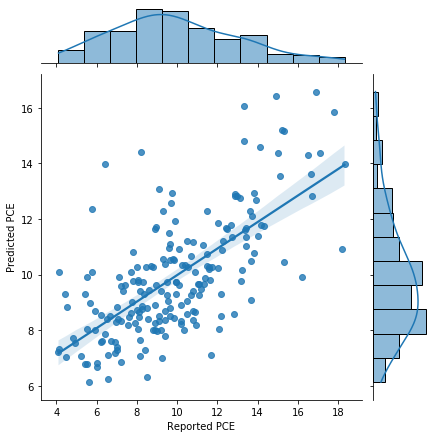

In [25]:
print('RF Results')    

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('R2Score',R2Score(ytests,y_pred_list_RF))
print('PearsonCoefficient',PearsonCoefficient(ytests,y_pred_list_RF))
print('RMSE',RMSE(ytests,y_pred_list_RF))
z=sns.jointplot(x=ytests, y=y_pred_list_RF,kind='reg', data=a)
z.ax_joint.set_xlabel('Reported PCE')
z.ax_joint.set_ylabel('Predicted PCE')



GB Results
R2Score 0.4891036634416336
PearsonCoefficient 0.7009003850701279
RMSE 2.200708850965336


Text(27.125, 0.5, 'Predicted PCE (%)')

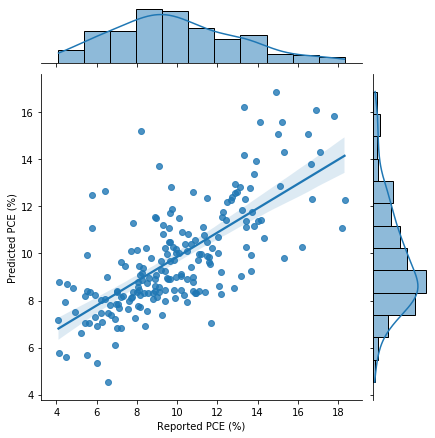

In [26]:
print('\n\nGB Results')

print('R2Score',R2Score(ytests,y_pred_list_GB))
print('PearsonCoefficient',PearsonCoefficient(ytests,y_pred_list_GB))
print('RMSE',RMSE(ytests,y_pred_list_GB))
z=sns.jointplot(x=ytests, y=y_pred_list_GB,kind='reg', data=a)
z.ax_joint.set_xlabel('Reported PCE (%)')
z.ax_joint.set_ylabel('Predicted PCE (%)')



SVM Results
R2Score 0.4493852307182632
PearsonCoefficient 0.674634414905232
MSE 5.219636364437732
RMSE 2.284652350892304
MAPE 19.00718285828752


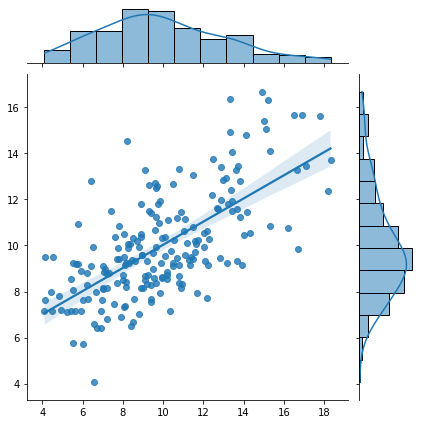

In [27]:
print('\n\nSVM Results')

print('R2Score',R2Score(ytests,y_pred_list_SVM))
print('PearsonCoefficient',PearsonCoefficient(ytests,y_pred_list_SVM))
print('MSE',MSE(ytests,y_pred_list_SVM))
print('RMSE',RMSE(ytests,y_pred_list_SVM))
print('MAPE',MAPE(ytests,y_pred_list_SVM))
sns.jointplot(x=ytests, y=y_pred_list_SVM,kind='reg', data=a)



ANN Results
R2Score 0.41114164755727123
PearsonCoefficient 0.6758274055833863
MSE 5.582172221646772
RMSE 2.362662104839956
MAPE 19.224480419714705


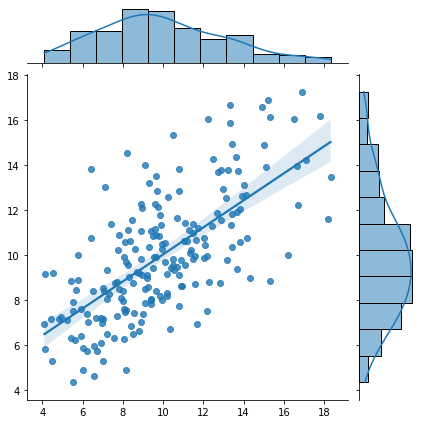

In [28]:
print('\n\nANN Results')

print('R2Score',R2Score(ytests,y_pred_list_ANN))
print('PearsonCoefficient',PearsonCoefficient(ytests,y_pred_list_ANN))
print('MSE',MSE(ytests,y_pred_list_ANN))
print('RMSE',RMSE(ytests,y_pred_list_ANN))
print('MAPE',MAPE(ytests,y_pred_list_ANN))
sns.jointplot(x=ytests, y=y_pred_list_ANN,kind='reg', data=a)

In [29]:
# # Result Dataframe
print('\n\nResults Dataframe\n')
result_data = [{'R2Score': R2Score(ytests,y_pred_list_RF),'PearsonCoefficient': PearsonCoefficient(ytests,y_pred_list_RF),
                'MSE': MSE(ytests,y_pred_list_RF),'RMSE': RMSE(ytests,y_pred_list_RF),'MAPE': MAPE(ytests,y_pred_list_RF)},
                {'R2Score': R2Score(ytests,y_pred_list_GB),'PearsonCoefficient': PearsonCoefficient(ytests,y_pred_list_GB),
                 'MSE': MSE(ytests,y_pred_list_GB),'RMSE': RMSE(ytests,y_pred_list_GB),'MAPE': MAPE(ytests,y_pred_list_GB)},
                {'R2Score': R2Score(ytests,y_pred_list_SVM),'PearsonCoefficient': PearsonCoefficient(ytests,y_pred_list_SVM),
                 'MSE': MSE(ytests,y_pred_list_SVM),'RMSE': RMSE(ytests,y_pred_list_SVM),'MAPE': MAPE(ytests,y_pred_list_SVM)},
                {'R2Score': R2Score(ytests,y_pred_list_ANN),'PearsonCoefficient': PearsonCoefficient(ytests,y_pred_list_ANN),
                 'MSE': MSE(ytests,y_pred_list_ANN),'RMSE': RMSE(ytests,y_pred_list_ANN),'MAPE': MAPE(ytests,y_pred_list_ANN)}] 
result_df = pd.DataFrame(result_data, index=['RF','GB','SVM','ANN'])
print(result_df)



Results Dataframe

      R2Score  PearsonCoefficient       MSE      RMSE       MAPE
RF   0.467042            0.683658  5.052261  2.247724  17.858496
GB   0.489104            0.700900  4.843119  2.200709  16.992319
SVM  0.449385            0.674634  5.219636  2.284652  19.007183
ANN  0.411142            0.675827  5.582172  2.362662  19.224480


In [30]:
model2 = GradientBoostingRegressor(random_state=42)
model2.fit(b,output)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
print(model2.feature_importances_)

[3.50892911e-03 5.10519526e-03 9.14730594e-03 1.40014726e-02
 1.04354324e-02 2.43478634e-03 1.18181154e-05 2.24658206e-04
 1.61931369e-02 8.92335434e-03 2.51359490e-02 3.73571760e-03
 3.18878401e-03 3.75712667e-03 3.68300943e-03 1.54338054e-02
 1.82754534e-03 1.49913240e-04 5.09190865e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.01421014e-03
 0.00000000e+00 8.93888000e-03 8.20668502e-03 0.00000000e+00
 2.84748481e-03 1.25655209e-02 2.78761464e-05 0.00000000e+00
 3.17818548e-04 2.07234605e-02 2.02337528e-06 3.82805803e-03
 5.80090292e-03 5.25417917e-03 3.47251428e-04 4.80002689e-03
 0.00000000e+00 3.88186862e-03 1.56145249e-01 9.06452863e-04
 9.85183594e-04 1.19194390e-03 5.22022023e-04 7.45920811e-03
 4.10598653e-03 1.58942356e-03 6.39860428e-03 0.00000000e+00
 4.90895422e-03 0.00000000e+00 1.57777092e-05 4.31381792e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.67118087e-03 3.60901372e-03
 3.12905782e-04 0.000000

# Feature importance

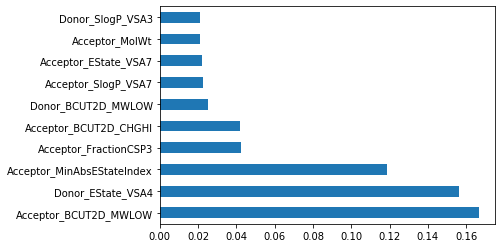

In [32]:
feature_importances1 = pd.Series(model2.feature_importances_,index=b.columns)
feature_importances1.nlargest(10).plot(kind='barh')
plt.show()

# Scatter plot of important features wth PCE

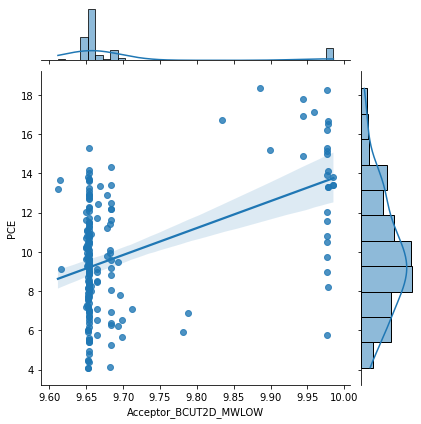

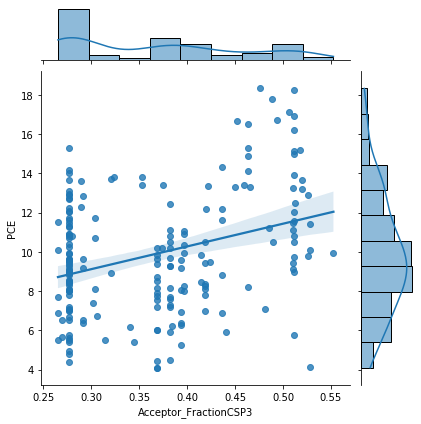

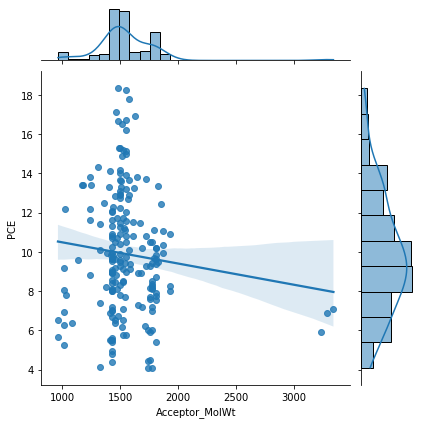

In [33]:
sns.jointplot(x=b["Acceptor_BCUT2D_MWLOW"], y=output, kind='reg');
sns.jointplot(x=b["Acceptor_FractionCSP3"], y=output, kind='reg');
sns.jointplot(x=b["Acceptor_MolWt"], y=output, kind='reg');

# Total number of D:A combinations that could be explored

In [34]:
a['Donor_can_smiles'].nunique()

70

In [35]:
a['Acceptor_can_smiles'].nunique()

95

In [36]:
a['Donor_can_smiles'].nunique() * a['Acceptor_can_smiles'].nunique()

6650

In [37]:
df=a

In [38]:
disinct_donor=df.drop_duplicates(subset=["Donor_can_smiles"])
disinct_donor=disinct_donor.reset_index()            # Getting distinct donors in the dataset

distinct_acceptor=df.drop_duplicates(subset=["Acceptor_can_smiles"])
distinct_acceptor=distinct_acceptor.reset_index()   # Getting distinct acceptors in the dataset

# Creating dataset for all possible combinations of donor and acceptor smiles
# importing product
from itertools import product 
# apply product method
d1=pd.DataFrame(list(product(disinct_donor['Donor_can_smiles'], distinct_acceptor['Acceptor_can_smiles'])), columns=['Donor_can_smiles', 'Acceptor_can_smiles'])

# Crating dataset for all possible combinations of donor and acceptor names
# importing product
from itertools import product
# apply product method
d2=pd.DataFrame(list(product(disinct_donor['Donor'], distinct_acceptor['Acceptor'])), columns=['Donor', 'Acceptor'])

#concat dataframes d1 and d2
frames =[d2, d1]
d3 = pd.concat(frames, axis =1)

# Original dataset, so that it can be concatenated vertically and then we can drop duplicate
d4=df[['Donor','Acceptor','Donor_can_smiles','Acceptor_can_smiles']]  

frames =[d4, d3]
d5 = pd.concat(frames, axis =0)

d5['D:A'] = d5[['Donor', 'Acceptor']].agg(':'.join, axis=1)
d5['D:A Smiles'] = d5[['Donor_can_smiles', 'Acceptor_can_smiles']].agg(':'.join, axis=1)

d6=d5.drop_duplicates(subset=["D:A Smiles"])
d6=d6.reset_index() 
d6

,index,Donor,Acceptor,Donor_can_smiles,Acceptor_can_smiles,D:A,D:A Smiles
0,0,D-0F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-0F:C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...
1,1,D-2F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-2F:C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...
2,2,D-4F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-4F:C8-ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...
3,3,D-0F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-0F:ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...
4,4,D-2F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-2F:ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...
...,...,...,...,...,...,...,...
6645,6644,J81,FDNCTF,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc(cc4C(c3cc2c2c1cc...,J81:FDNCTF,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...
6646,6645,J81,IDT-N,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc(sc2c2...,J81:IDT-N,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...
6647,6646,J81,IDT-T-N,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc(sc2c2...,J81:IDT-T-N,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...
6648,6647,J81,IDIC,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCC1(CCCCCC)c2cc(sc2c2c1cc1c3sc(cc3C(c1c2)...,J81:IDIC,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...


In [39]:
df=pd.read_csv('6650 DA combination.csv')
df

,Unnamed: 0,Unnamed: 0.1,Donor,Acceptor,Donor_can_smiles,Acceptor_can_smiles,D:A,PCE,Donor_MaxEStateIndex,Donor_MinEStateIndex,...,Acceptor_fr_sulfide,Acceptor_fr_sulfonamd,Acceptor_fr_sulfone,Acceptor_fr_term_acetylene,Acceptor_fr_tetrazole,Acceptor_fr_thiazole,Acceptor_fr_thiocyan,Acceptor_fr_thiophene,Acceptor_fr_unbrch_alkane,Acceptor_fr_urea
0,0,0,D-0F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-0F:C8-ITIC,11.6,15.826616,0.070509,...,0,0,0,0,0,0,0,4,16,0
1,1,1,D-2F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-2F:C8-ITIC,12.2,17.472290,-0.373608,...,0,0,0,0,0,0,0,4,16,0
2,2,2,D-4F,C8-ITIC,CCCCC(Cc1ccc(s1)c1c2sc(c(c2c(c2c1c(F)cs2)c1ccc...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc5c(c4C(c3cc2c2c1c...,D-4F:C8-ITIC,8.8,18.497612,-0.645564,...,0,0,0,0,0,0,0,4,16,0
3,3,3,D-0F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-0F:ITIC,8.0,15.826616,0.070509,...,0,0,0,0,0,0,0,4,8,0
4,4,4,D-2F,ITIC,CCCCC(Cc1ccc(s1)c1c2cc(sc2c(c2c1scc2)c1ccc(s1)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc3c4sc5...,D-2F:ITIC,8.9,17.472290,-0.373608,...,0,0,0,0,0,0,0,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,6645,6645,J81,FDNCTF,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCCCC1(CCCCCCCC)c2cc3c4sc(cc4C(c3cc2c2c1cc...,J81:FDNCTF,NaN,17.387649,-1.763283,...,0,0,0,0,0,0,0,2,24,0
6646,6646,6646,J81,IDT-N,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc(sc2c2...,J81:IDT-N,NaN,17.387649,-1.763283,...,0,0,0,0,0,0,0,2,8,0
6647,6647,6647,J81,IDT-T-N,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCc1ccc(cc1)C1(c2ccc(cc2)CCCCCC)c2cc(sc2c2...,J81:IDT-T-N,NaN,17.387649,-1.763283,...,0,0,0,0,0,0,0,4,8,0
6648,6648,6648,J81,IDIC,Cc1oc2c(c1)c(c1c(c2c2ccc([Si](CCC)(CCC)CCC)s2)...,CCCCCCC1(CCCCCC)c2cc(sc2c2c1cc1c3sc(cc3C(c1c2)...,J81:IDIC,NaN,17.387649,-1.763283,...,0,0,0,0,0,0,0,2,8,0


# Applying feature engineering in 6650 dataset

In [40]:
output = df['PCE']
b= df.drop(['PCE','Donor','Acceptor','Donor_can_smiles','Acceptor_can_smiles','D:A'],axis=1)
b=b.select_dtypes(include='number')  
print('Features with zero standard deviation :',len(b.std()[b.std() == 0])) #displaying features with zero std deviation
b=b.drop(b.std()[b.std() == 0].index.values, axis=1)  # Dropping features with zero std deviation
b = b.replace([np.inf, -np.inf], np.nan)
b = b.replace(np.nan,0)  #replace null values with zero
inputs=b

Features with zero standard deviation : 130


In [41]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(b, 0.8)
print('Features with correlation more than 0.8 :',len(set(corr_features)))
b=b.drop(corr_features,axis=1)   # Dropping features with correlation more than 0.8

Features with correlation more than 0.8 : 152


In [42]:
b=b.drop(['Donor_Ipc','Acceptor_Ipc'],axis=1)

In [43]:
b.shape

(6650, 134)

In [44]:
b

,Unnamed: 0,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MinAbsEStateIndex,Donor_qed,Donor_MolWt,Donor_MaxPartialCharge,Donor_MinPartialCharge,Donor_MaxAbsPartialCharge,Donor_BCUT2D_MWHI,...,Acceptor_NumAromaticHeterocycles,Acceptor_NumHAcceptors,Acceptor_NumSaturatedHeterocycles,Acceptor_fr_Ar_N,Acceptor_fr_alkyl_halide,Acceptor_fr_aniline,Acceptor_fr_bicyclic,Acceptor_fr_halogen,Acceptor_fr_thiazole,Acceptor_fr_unbrch_alkane
0,0,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,4,10,0,0,0,0,12,0,0,16
1,1,17.472290,-0.373608,0.140776,0.046822,1221.902,0.196678,-0.288460,0.288460,32.143294,...,4,10,0,0,0,0,12,0,0,16
2,2,18.497612,-0.645564,0.079293,0.043799,1257.882,0.196678,-0.288460,0.288460,32.143296,...,4,10,0,0,0,0,12,0,0,16
3,3,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,4,10,0,0,0,0,12,0,0,8
4,4,17.472290,-0.373608,0.140776,0.046822,1221.902,0.196678,-0.288460,0.288460,32.143294,...,4,10,0,0,0,0,12,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,6645,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,13,0,0,24
6646,6646,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,10,0,0,8
6647,6647,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,4,10,0,0,0,0,10,0,0,8
6648,6648,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,8,0,0,8


# Creating train-test dataset

In [45]:
X_train=b[0:200]
X_test=b[200:]
y_train=output[0:200]
y_test=output[200:]

In [46]:
X_train

,Unnamed: 0,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MinAbsEStateIndex,Donor_qed,Donor_MolWt,Donor_MaxPartialCharge,Donor_MinPartialCharge,Donor_MaxAbsPartialCharge,Donor_BCUT2D_MWHI,...,Acceptor_NumAromaticHeterocycles,Acceptor_NumHAcceptors,Acceptor_NumSaturatedHeterocycles,Acceptor_fr_Ar_N,Acceptor_fr_alkyl_halide,Acceptor_fr_aniline,Acceptor_fr_bicyclic,Acceptor_fr_halogen,Acceptor_fr_thiazole,Acceptor_fr_unbrch_alkane
0,0,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,4,10,0,0,0,0,12,0,0,16
1,1,17.472290,-0.373608,0.140776,0.046822,1221.902,0.196678,-0.288460,0.288460,32.143294,...,4,10,0,0,0,0,12,0,0,16
2,2,18.497612,-0.645564,0.079293,0.043799,1257.882,0.196678,-0.288460,0.288460,32.143296,...,4,10,0,0,0,0,12,0,0,16
3,3,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,4,10,0,0,0,0,12,0,0,8
4,4,17.472290,-0.373608,0.140776,0.046822,1221.902,0.196678,-0.288460,0.288460,32.143294,...,4,10,0,0,0,0,12,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,17.546757,-1.774777,0.233235,0.028395,1321.229,0.170047,-0.202927,0.202927,32.140321,...,4,10,0,0,0,0,12,0,0,8
196,196,17.398135,-1.677300,0.225590,0.029277,1265.121,0.170047,-0.202927,0.202927,32.140319,...,4,10,0,0,0,0,12,0,0,8
197,197,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,4,10,0,0,0,0,12,0,0,8
198,198,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,4,10,0,0,0,0,12,0,0,8


In [47]:
X_test

,Unnamed: 0,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MinAbsEStateIndex,Donor_qed,Donor_MolWt,Donor_MaxPartialCharge,Donor_MinPartialCharge,Donor_MaxAbsPartialCharge,Donor_BCUT2D_MWHI,...,Acceptor_NumAromaticHeterocycles,Acceptor_NumHAcceptors,Acceptor_NumSaturatedHeterocycles,Acceptor_fr_Ar_N,Acceptor_fr_alkyl_halide,Acceptor_fr_aniline,Acceptor_fr_bicyclic,Acceptor_fr_halogen,Acceptor_fr_thiazole,Acceptor_fr_unbrch_alkane
200,200,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,2,12,2,4,0,0,5,0,0,10
201,201,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,4,14,2,4,0,0,8,0,0,20
202,202,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,7,15,0,5,0,0,16,0,0,0
203,203,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,9,17,0,5,0,0,16,0,0,0
204,204,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,0,8,0,0,0,0,14,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,6645,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,13,0,0,24
6646,6646,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,10,0,0,8
6647,6647,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,4,10,0,0,0,0,10,0,0,8
6648,6648,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,8,0,0,8


# Fitting and prediction

In [48]:
gb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train) 
y_pred = gb.predict(X_test)

In [49]:
y_pred.shape

(6450,)

(array([  32.,  242.,  768., 1451., 1538., 1274.,  728.,  307.,   91.,
          19.]),
 array([ 3.31080581,  4.81282093,  6.31483604,  7.81685116,  9.31886628,
        10.8208814 , 12.32289651, 13.82491163, 15.32692675, 16.82894186,
        18.33095698]),
 <a list of 10 Patch objects>)

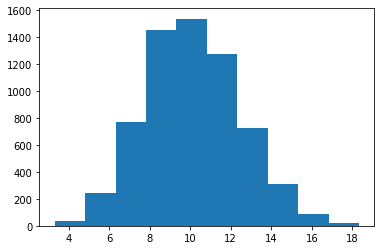

In [50]:
plt.hist(y_pred)

In [51]:
X_test

,Unnamed: 0,Donor_MaxEStateIndex,Donor_MinEStateIndex,Donor_MinAbsEStateIndex,Donor_qed,Donor_MolWt,Donor_MaxPartialCharge,Donor_MinPartialCharge,Donor_MaxAbsPartialCharge,Donor_BCUT2D_MWHI,...,Acceptor_NumAromaticHeterocycles,Acceptor_NumHAcceptors,Acceptor_NumSaturatedHeterocycles,Acceptor_fr_Ar_N,Acceptor_fr_alkyl_halide,Acceptor_fr_aniline,Acceptor_fr_bicyclic,Acceptor_fr_halogen,Acceptor_fr_thiazole,Acceptor_fr_unbrch_alkane
200,200,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,2,12,2,4,0,0,5,0,0,10
201,201,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,4,14,2,4,0,0,8,0,0,20
202,202,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,7,15,0,5,0,0,16,0,0,0
203,203,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,9,17,0,5,0,0,16,0,0,0
204,204,15.826616,0.070509,0.070509,0.046822,1185.922,0.196678,-0.288460,0.288460,32.143291,...,0,8,0,0,0,0,14,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,6645,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,13,0,0,24
6646,6646,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,10,0,0,8
6647,6647,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,4,10,0,0,0,0,10,0,0,8
6648,6648,17.387649,-1.763283,0.164752,0.030382,1204.931,0.170047,-0.460638,0.460638,32.137355,...,2,8,0,0,0,0,8,0,0,8


In [52]:
aa=pd.DataFrame(y_pred, columns=['PCE'])

In [53]:
aa

,PCE
0,8.632041
1,10.361853
2,13.089429
3,13.065201
4,9.721086
...,...
6445,9.128198
6446,6.265888
6447,6.381765
6448,6.649234


In [54]:
y_pred

array([ 8.63204109, 10.3618528 , 13.08942918, ...,  6.38176539,
        6.64923447, 11.94826458])

In [55]:
bb=df[['Donor','Acceptor']][201:]

In [56]:
bb

,Donor,Acceptor
201,D-0F,IDTBR
202,D-0F,Y1
203,D-0F,Y2
204,D-0F,SF-PDI2
205,D-0F,Y11
...,...,...
6645,J81,FDNCTF
6646,J81,IDT-N
6647,J81,IDT-T-N
6648,J81,IDIC


In [57]:
bb=bb.reset_index() 

# Predicted PCE of 6450 D:A combination

In [58]:
frames =[bb, aa]
new_df = pd.concat(frames, axis =1)
new_df

,index,Donor,Acceptor,PCE
0,201.0,D-0F,IDTBR,8.632041
1,202.0,D-0F,Y1,10.361853
2,203.0,D-0F,Y2,13.089429
3,204.0,D-0F,SF-PDI2,13.065201
4,205.0,D-0F,Y11,9.721086
...,...,...,...,...
6445,6646.0,J81,IDT-N,9.128198
6446,6647.0,J81,IDT-T-N,6.265888
6447,6648.0,J81,IDIC,6.381765
6448,6649.0,J81,DTC-4F,6.649234


In [59]:
new_df=new_df.drop(['index'],axis=1)

# Top 20 D:A combinations for OSCs

In [60]:
new_df.nlargest(10, ['PCE'])

,Donor,Acceptor,PCE
3252,PFBCPZ,IDTCN,18.330957
5406,D18,IDTCN,17.757347
3189,PFBCPZ,BTA3,17.695397
3208,PFBCPZ,Aqx-2,17.671650
3230,PFBCPZ,ABP4T-4F,17.663641
3209,PFBCPZ,3TP3T-4F,17.467006
4395,PBQ-4F,IDST-4F,17.446283
2734,PM7,ZITI-S,17.423664
3229,PFBCPZ,BP5T-4F,17.404291
3231,PFBCPZ,F-2Cl,17.360786
